In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("supermarket.csv")

In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.isnull().sum()
#boş veri varsa onu gösterir

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
df.sample(3)
#rastgele bir veriyi çeker

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
778,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5,6.3125,132.5625,3/20/2019,17:52,Cash,126.25,4.761905,6.3125,6.1
327,719-76-3868,C,Naypyitaw,Member,Male,Food and beverages,94.26,4,18.8520,395.8920,3/12/2019,16:30,Cash,377.04,4.761905,18.8520,8.6
975,883-69-1285,B,Mandalay,Member,Male,Fashion accessories,49.92,2,4.9920,104.8320,3/6/2019,11:55,Credit card,99.84,4.761905,4.9920,7.0


In [11]:
df["City"].unique()
#uniqe tekrar etmeyen eşsiz değerleri verir

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [14]:
df["Branch"].nunique()
# eşsiz verilerin sayısını verir

3

In [15]:
df.Total.max()
#bir satıştaki maksimum alışveriş ödemesini gösterir

1042.65

In [16]:
df["Total"].max()
#bu şekilde de yapılır

1042.65

In [17]:
df["Total"].max(),df["Total"].mean()

(1042.65, 322.96674900000005)

In [20]:
df.Total.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [21]:
df["Date"]=pd.to_datetime(df["Date"])
#date verisi yazı olarak görüldüğü için bunu tarih olarak (sayı) çevirdik

In [23]:
df["day"]=(df["Date"]).dt.day
df["month"]=(df["Date"]).dt.month
df["year"]=(df["Date"]).dt.year
#tablonun sonuna yeni sütun ekledik gün tarih saat ekledik

In [26]:
df["month_name"]=df["Date"].dt.month_name()

In [27]:
df["weekday"]=df["Date"].dt.day_name()

In [28]:
df["Time"]=pd.to_datetime(df["Time"])

In [29]:
df["Hour"]=(df["Time"]).dt.hour

In [30]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday,10


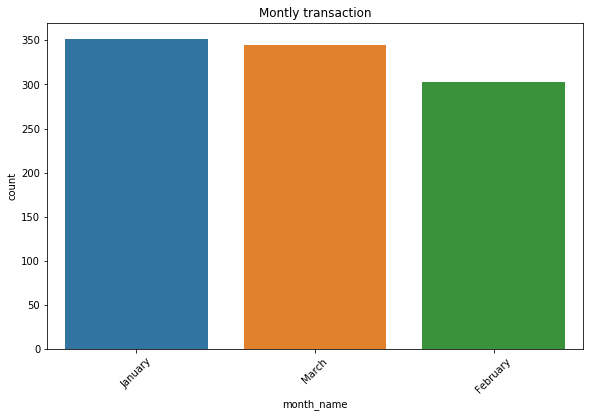

In [34]:
plt.figure(figsize=(9.6, 6))
plt.title('Montly transaction')
sns.countplot(df['month_name'])
plt.xticks(rotation=45);

#altın oran da birisi diğerinin 1.6 katı olduğunda görüntü hoş duruyormuş

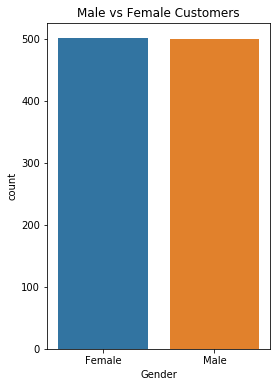

In [38]:
plt.figure(figsize=(4,6))
plt.title("Male vs Female Customers")
sns.countplot(df["Gender"]); #cinsiyet sütunundaki alışveriş yapanların sayısı
#kadın ve erkeklerin alışveriş yapma oranı

In [39]:
df["month_name"].value_counts()
#aylık yapılan alışveriş sayısı

January     352
March       345
February    303
Name: month_name, dtype: int64

In [40]:
df["Gender"].value_counts()
#toplam alışveriş yapan kadın ve erkeklerin sayısı

Female    501
Male      499
Name: Gender, dtype: int64

In [41]:
df["weekday"].value_counts()
#haftalık hangi gün ne kadar satış yapılmış

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

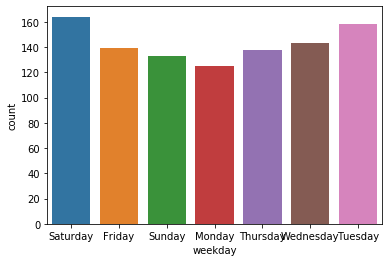

In [43]:
sns.countplot(df["weekday"]);

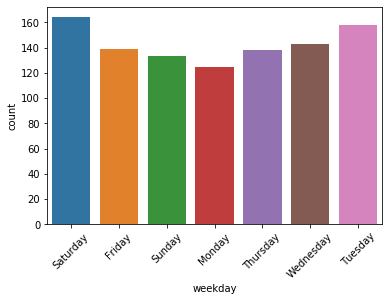

In [44]:
sns.countplot(df["weekday"])
plt.xticks(rotation=45);
#yazıları 45 derece döndürüyor

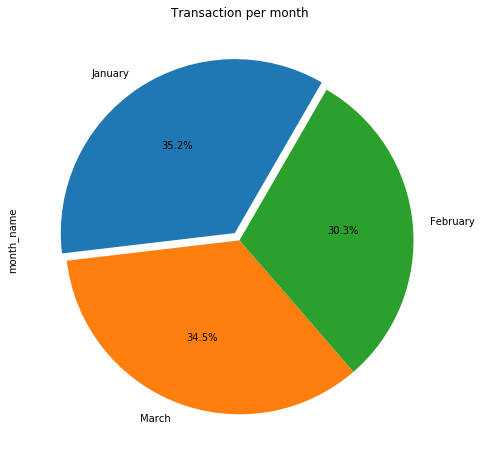

In [49]:
plt.figure(figsize=(8, 8))
explode=(0.05,0,0) # pasta dilimi aralarındaki boşluk
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60,explode=explode)
plt.title('Transaction per month');
#pasta grafiği yapıyoruz

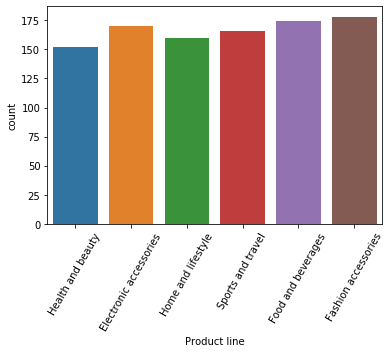

In [51]:
sns.countplot(df["Product line"])
plt.xticks(rotation=60);

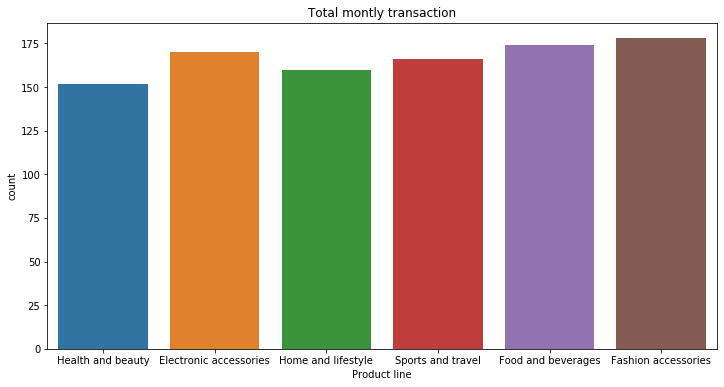

In [53]:
plt.figure(figsize=(12,6))
plt.title(("Total montly transaction"))
sns.countplot(df["Product line"]);

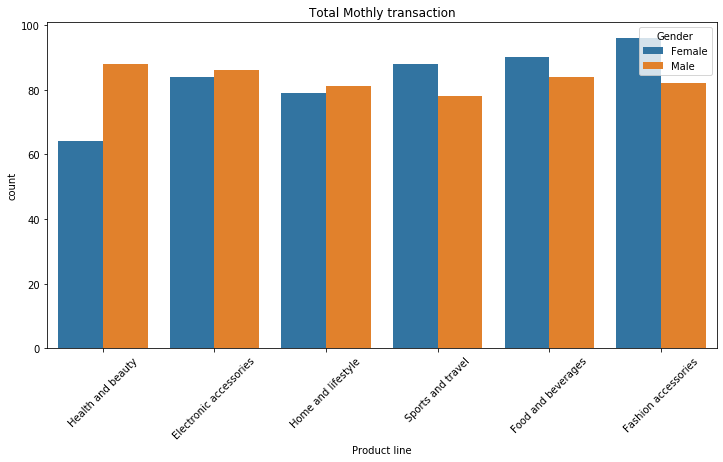

In [54]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Product line'], hue =df.Gender)
plt.xticks(rotation=45);
#hangi ürünü hangi cinsiyet daha fazla almış

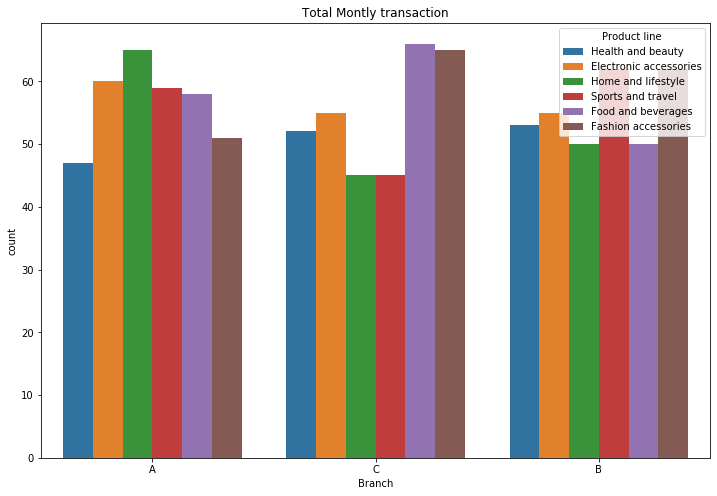

In [58]:
plt.figure(figsize=(12,8))
plt.title("Total Montly transaction")
sns.countplot(df["Branch"],hue=df["Product line"]);
#hangi şubede hangi ürün daha çok satılmış

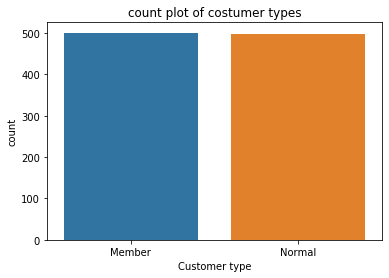

In [59]:
plt.title("count plot of costumer types")
sns.countplot(df["Customer type"]);
#müşteri tipine göre yapılan alışveriş

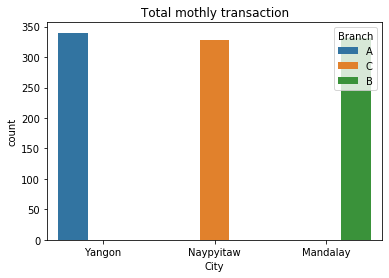

In [63]:
plt.title("Total mothly transaction")
sns.countplot(df["City"],hue=df["Branch"]);
#her şehirde kaç tane sepet dolmuş

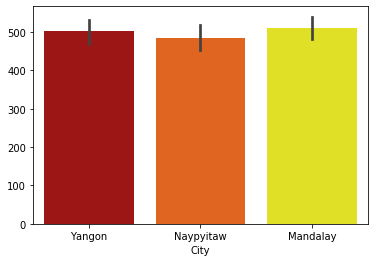

In [73]:
sns.barplot(x=df["City"],y=df.index,palette="hot");